In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/hayeon/Downloads/backorder_test.csv")

In [54]:
df = df.drop(['sku','Unnamed: 0'],axis=1)

In [55]:
df["went_on_backorder"]=df.went_on_backorder.map({0:"No",1:"Yes"})

In [56]:
# 수정한 데이터 확인
df

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,lead_time
0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-99.00,-99.00,0.0,1,0,0,1,0,No,8.06
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,-99.00,0.0,0,0,0,1,0,No,7.56
2,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-99.00,-99.00,0.0,0,0,1,0,0,No,2.56
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.00,-99.00,0.0,1,0,0,1,0,No,37.70
4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.10,0.13,0.0,0,0,0,1,0,No,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902350,0.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,...,0.69,0.69,5.0,1,0,0,1,0,No,2.00
1902351,-1.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,...,-99.00,-99.00,1.0,0,0,0,1,0,No,11.76
1902352,-1.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,...,0.86,0.84,1.0,1,0,0,0,0,Yes,9.00
1902353,62.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,...,0.86,0.84,6.0,0,0,0,1,0,No,9.00


In [57]:
df["went_on_backorder"]=df.went_on_backorder.map({"No":0,"Yes":1})

In [58]:
pd.set_option('display.precision', 2)

In [59]:
# 한달 수량 예측치
a = df['forecast_3_month'] / 3
b = df['forecast_6_month'] / 6
c = df['forecast_9_month'] / 9

df['forcast_1_month'] = (a+b+c) / 3

In [60]:
# 예측 지난 1년 판매수량
a = df['sales_1_month'] * 12
b = df['sales_3_month'] * 4
c = df['sales_6_month'] * 2
e = df['sales_9_month'] * (12/9)

df['forcast_sales_12_month'] = (a+b+c+e) / 4

In [61]:
# 한달치 평균 실적
a = df['perf_6_month_avg']/6
b = df['perf_12_month_avg']/12

df['forcast_perf_1_month_avg'] = (a+b)/2

In [62]:
df

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,...,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,lead_time,forcast_1_month,forcast_sales_12_month,forcast_perf_1_month_avg
0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,1,0,0,8.06,0.00,0.00,-12.38
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,7.56,0.00,0.00,-12.38
2,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,2.56,0.00,0.00,-12.38
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,37.70,0.00,0.00,-12.38
4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,8.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902350,0.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,...,1,0,0,1,0,0,2.00,2.04,10.83,0.09
1902351,-1.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,...,0,0,0,1,0,0,11.76,1.28,10.17,-12.38
1902352,-1.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,...,1,0,0,0,0,1,9.00,1.69,17.50,0.11
1902353,62.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,...,0,0,0,1,0,0,9.00,13.83,312.83,0.11


## 연습 모델 적합

In [63]:
X = df.drop(['went_on_backorder'], axis=1)
y = df[['went_on_backorder']]

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred1)

print(acc)

0.9906978504549095


In [64]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(random_state=0, max_depth=3)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### 모델성능 평가

In [65]:
temp_y_pred1 = tree1.predict(X_test)

print('예측값\n',temp_y_pred1)
print('실제값\n',y_test)

예측값
 [0 0 0 ... 0 0 0]
실제값
          went_on_backorder
885793                   0
1464176                  0
1579626                  0
599116                   0
1211652                  0
...                    ...
1331964                  0
1737213                  0
642419                   0
67183                    0
1147100                  0

[475589 rows x 1 columns]


In [66]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

temp_acc1=accuracy_score(y_test,temp_y_pred1)


print("정확도:",format(temp_acc1))

정확도: 0.9927836850726153


In [67]:
# 오차행렬(Confusion Matrix)
print(confusion_matrix(y_test,temp_y_pred1))

[[472157      0]
 [  3432      0]]


In [68]:
# 모델성능
print(classification_report((tree1.predict(X_test)>0.5).astype("int16"),y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    475589
           1       0.00      0.00      0.00         0

    accuracy                           0.99    475589
   macro avg       0.50      0.50      0.50    475589
weighted avg       1.00      0.99      1.00    475589



/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



# 의사결정나무
## 모든 변수를 사용한 의사결정나무

In [69]:
train_scores, test_scores = list(), list()
# train_score과 test_score의 정확도를 저장 장소
# train_score는 훈련 데이터에 특화될수록 증가
# test_score는 테스트 데이터에 일반화 될 수록 증가

In [70]:
# 의사결정나무 모델의 depth 조절(1부터 19까지)
for i in range(1,20):
    DT = DecisionTreeClassifier(max_depth=i)
    # 깊이를 증가시키면서 의사결정 나무 모델 적합
    DT.fit(X_train,y_train)
    
    # training dataset 정확도 편가
    train_att = DT.predict(X_train)
    train_acc = accuracy_score(y_train,train_att)
    train_scores.append(train_acc)
    
    # test dataset 정확도 평가
    test_att = DT.predict(X_test)
    test_acc = accuracy_score(y_test,test_att)
    test_scores.append(test_acc)
    
    # train 정학도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f,test: %.3f'%(i,train_acc,test_acc))

>1, train: 0.993,test: 0.993
>2, train: 0.993,test: 0.993
>3, train: 0.993,test: 0.993
>4, train: 0.993,test: 0.993
>5, train: 0.993,test: 0.993
>6, train: 0.993,test: 0.993
>7, train: 0.993,test: 0.993
>8, train: 0.993,test: 0.993
>9, train: 0.993,test: 0.993
>10, train: 0.993,test: 0.993
>11, train: 0.994,test: 0.993
>12, train: 0.994,test: 0.993
>13, train: 0.994,test: 0.992
>14, train: 0.995,test: 0.992
>15, train: 0.995,test: 0.992
>16, train: 0.996,test: 0.992
>17, train: 0.996,test: 0.992
>18, train: 0.997,test: 0.992
>19, train: 0.997,test: 0.992


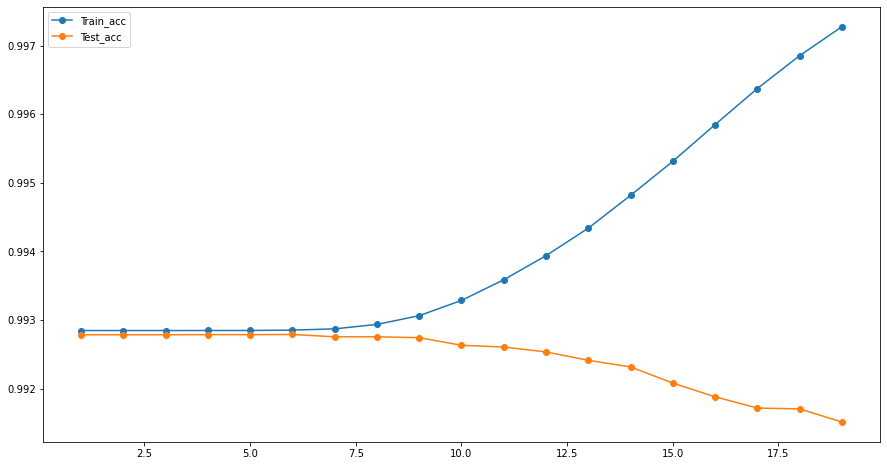

In [71]:
from matplotlib import pyplot

pyplot.plot(range(1,20),train_scores,'-o',label='Train_acc')
pyplot.plot(range(1,20),test_scores,'-o',label='Test_acc')
pyplot.legend()
pyplot.show()

# 최적의 의사결정 나무 깊이는?


In [72]:
# 트리 시각화를 위한 라이브러리 설치
#!pip install pydotplus
#!pip install graphviz

In [73]:
target_name = np.array(['No', 'Yes'])

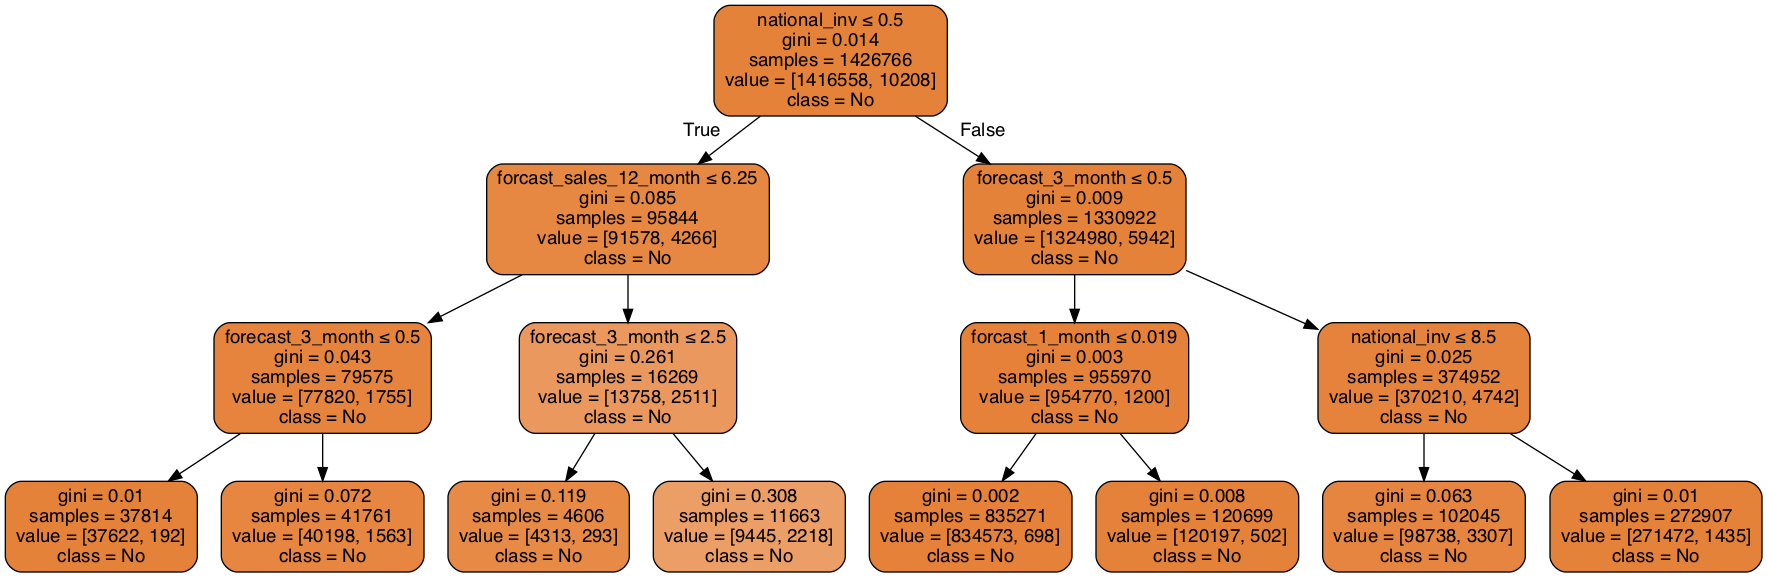

In [74]:
# 트리 시각화
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image

feature_name = X.columns
tree1 = export_graphviz(tree1, feature_names=feature_name,
                           class_names= target_name,
                           filled=True, rounded=True,
                           special_characters=True)	 
# 그래프 그리기



graph = pydotplus.graph_from_dot_data(tree1)
Image(graph.create_png())

## 상관관계 파악

In [75]:
# 상관관계 파악 코드
# sns.set(rc = {'figure.figsize':(15,8)}) 출력할 그래프의 사이즈 조정
# ax = sns.heatmap(데이터명.corr(), annot=True) # 데이터명자리에 데이터셋 이름 넣고 출력하기 (오류나면 annot=True 빼기)

In [76]:
df.corr()

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,...,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,lead_time,forcast_1_month,forcast_sales_12_month,forcast_perf_1_month_avg
national_inv,1.00e+00,9.84e-02,7.97e-02,8.10e-02,8.01e-02,1.56e-01,1.92e-01,2.25e-01,2.40e-01,4.06e-01,...,-5.05e-03,1.94e-04,-2.31e-05,-3.30e-03,-2.66e-04,-1.36e-03,2.58e-03,8.07e-02,2.08e-01,-1.28e-02
in_transit_qty,9.84e-02,1.00e+00,6.39e-01,6.69e-01,6.63e-01,6.22e-01,6.89e-01,6.78e-01,6.47e-01,7.43e-01,...,-1.62e-02,2.43e-03,-4.35e-04,-1.31e-03,9.92e-04,-2.51e-03,-8.09e-03,6.60e-01,6.81e-01,3.62e-03
forecast_3_month,7.97e-02,6.39e-01,1.00e+00,9.88e-01,9.71e-01,6.87e-01,7.64e-01,8.17e-01,8.09e-01,7.18e-01,...,-1.70e-02,2.83e-03,-3.53e-03,2.79e-03,4.61e-04,-3.38e-05,-9.90e-03,9.92e-01,7.92e-01,8.57e-03
forecast_6_month,8.10e-02,6.69e-01,9.88e-01,1.00e+00,9.94e-01,7.08e-01,7.99e-01,8.58e-01,8.51e-01,7.36e-01,...,-1.75e-02,2.57e-03,-3.80e-03,3.41e-03,-1.13e-04,-5.88e-04,-1.04e-02,9.99e-01,8.28e-01,8.51e-03
forecast_9_month,8.01e-02,6.63e-01,9.71e-01,9.94e-01,1.00e+00,7.24e-01,8.22e-01,8.85e-01,8.79e-01,7.34e-01,...,-1.78e-02,2.61e-03,-3.92e-03,3.56e-03,-3.12e-04,-8.28e-04,-1.06e-02,9.93e-01,8.52e-01,8.49e-03
sales_1_month,1.56e-01,6.22e-01,6.87e-01,7.08e-01,7.24e-01,1.00e+00,9.18e-01,8.73e-01,8.24e-01,7.69e-01,...,-1.48e-02,3.48e-03,-8.29e-04,-4.83e-03,-5.33e-04,-1.16e-03,-6.53e-03,7.10e-01,9.39e-01,1.49e-03
sales_3_month,1.92e-01,6.89e-01,7.64e-01,7.99e-01,8.22e-01,9.18e-01,1.00e+00,9.75e-01,9.30e-01,8.54e-01,...,-1.70e-02,3.68e-03,-1.11e-03,-5.01e-03,-5.77e-04,-1.48e-03,-7.65e-03,7.98e-01,9.88e-01,1.87e-03
sales_6_month,2.25e-01,6.78e-01,8.17e-01,8.58e-01,8.85e-01,8.73e-01,9.75e-01,1.00e+00,9.74e-01,8.39e-01,...,-1.80e-02,3.76e-03,-2.09e-03,-3.10e-03,-5.42e-04,-1.72e-03,-8.34e-03,8.57e-01,9.85e-01,3.27e-03
sales_9_month,2.40e-01,6.47e-01,8.09e-01,8.51e-01,8.79e-01,8.24e-01,9.30e-01,9.74e-01,1.00e+00,8.04e-01,...,-1.80e-02,3.62e-03,-2.67e-03,-1.98e-03,-5.50e-04,-1.78e-03,-8.53e-03,8.50e-01,9.59e-01,3.84e-03
min_bank,4.06e-01,7.43e-01,7.18e-01,7.36e-01,7.34e-01,7.69e-01,8.54e-01,8.39e-01,8.04e-01,1.00e+00,...,-2.02e-02,3.24e-03,9.50e-04,-7.93e-03,1.66e-03,-1.72e-03,-8.01e-03,7.33e-01,8.43e-01,-1.60e-03


<AxesSubplot:>

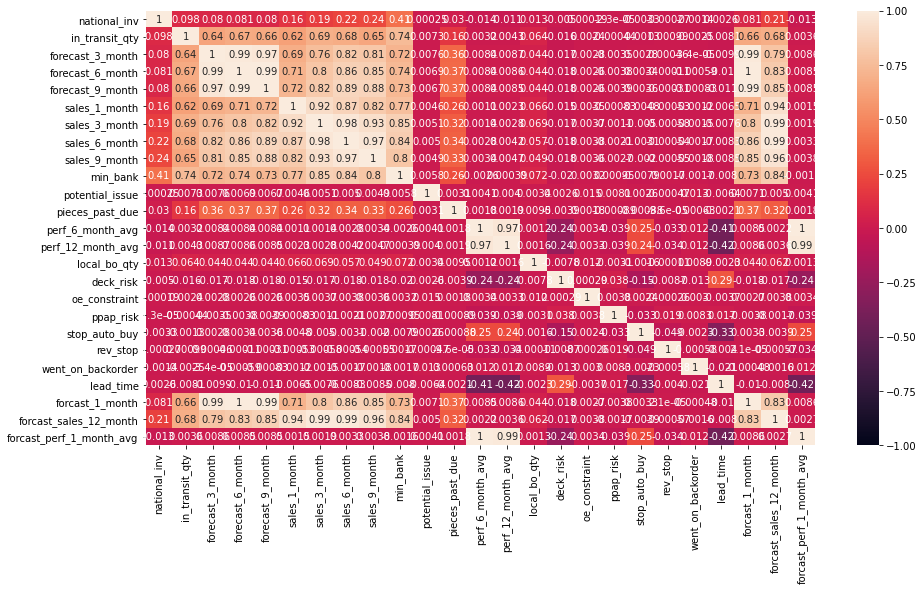

In [77]:
# heatmap으로 상관관계를 표시
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

### 변수 중요도

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [81]:
model.score(X_train, y_train)

0.9928411526487174

In [82]:
model.score(X_test, y_test)

0.9927668638256982

In [83]:
# 각 teature들의 계수 확인
model.coef_

array([[-8.75173048e+00, -8.78936055e+00,  2.55289986e-01,
        -5.89066770e-01,  3.11722430e-01, -2.11655195e-02,
        -3.55426636e-01,  6.46039101e-01, -2.26805614e-03,
         1.16024335e-01,  4.67664288e-02,  5.34993993e-02,
         1.19713280e-02,  3.94983488e-02,  3.20341613e-02,
        -1.48533951e-01,  1.33219433e-02,  9.26452646e-02,
        -1.19724131e-01, -3.53737611e-02, -5.01213822e-01,
        -8.06527060e-03,  5.50363608e-02,  2.11274419e-02]])

In [84]:
# 변수 중요도
df.columns


Index(['national_inv', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder',
       'lead_time', 'forcast_1_month', 'forcast_sales_12_month',
       'forcast_perf_1_month_avg'],
      dtype='object')

In [85]:
a = ['national_inv', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'lead_time', 'forcast_1_month', 'forcast_sales_12_month',
       'forcast_perf_1_month_avg']

In [86]:
n = pd.DataFrame(model.coef_.reshape((1,-1)), columns=a, index=['f_importance'])
n

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,...,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,lead_time,forcast_1_month,forcast_sales_12_month,forcast_perf_1_month_avg
f_importance,-8.75,-8.79,0.26,-0.59,0.31,-0.02,-0.36,0.65,-2.27e-03,0.12,...,0.03,-0.15,0.01,0.09,-0.12,-0.04,-0.5,-8.07e-03,0.06,0.02


In [87]:
nf = n.transpose()
nf

,f_importance
national_inv,-8.75e+00
in_transit_qty,-8.79e+00
forecast_3_month,2.55e-01
forecast_6_month,-5.89e-01
forecast_9_month,3.12e-01
sales_1_month,-2.12e-02
sales_3_month,-3.55e-01
sales_6_month,6.46e-01
sales_9_month,-2.27e-03
min_bank,1.16e-01


In [88]:
import plotly.graph_objects as go

fig = go.Figure(layout=go.Layout(height=600, width=1000))


fig.add_trace(
    go.Scatter(
        x=nf.index, y=nf['f_importance'], name = '변수 중요도',mode='lines+markers',
        line = dict(color='red'), marker = dict(color='skyblue')
    )
)


fig.update_layout(
{
    'title':{
        'text':'로지스틱 회귀 - 변수 중요도',
        'font':{
            'size':15
        }
    },
    'showlegend':True,
    'xaxis':{
        'title':'컬럼명'
    },
    'yaxis':{
        'title':'변수 중요도 값'
    }
})

fig.update_layout( template = 'plotly_dark')

fig.show()

## 변수 10개만 골라내서 만든 의사결정나무
##### 상위 10개 변수: 'forecast_3_month','forecast_9_month','slaes_9_month','perf_6_month_avg','potential_issue','ppap_risk','forcast_1_month',
####                           'rev_stop''forcast_sales_12_month','forcast_perf_1_month_avg'

### 모델적합

In [89]:
df1=df[['forecast_3_month','forecast_9_month','sales_9_month','perf_6_month_avg','potential_issue','ppap_risk','forcast_1_month','rev_stop'
         ,'forcast_sales_12_month','forcast_perf_1_month_avg','went_on_backorder']]

In [90]:
X = df1[['forecast_3_month','forecast_9_month','sales_9_month','perf_6_month_avg','potential_issue','ppap_risk','forcast_1_month','rev_stop'
         ,'forcast_sales_12_month','forcast_perf_1_month_avg']]
y = df1[['went_on_backorder']]

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred2)

from sklearn.tree import DecisionTreeClassifier


print(acc)

0.9889968018604299


In [91]:
from sklearn.tree import DecisionTreeClassifier

tree2 = DecisionTreeClassifier(random_state=0, max_depth=3)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### 모델성능평가

In [92]:
temp_y_pred2 = tree2.predict(X_test)

print('예측값\n',temp_y_pred2)
print('실제값\n',y_test)



예측값
 [0 0 0 ... 0 0 0]
실제값
          went_on_backorder
1641453                  0
1053181                  0
145121                   0
255627                   0
1408084                  0
...                    ...
559114                   0
61411                    0
1101217                  0
1075136                  0
1058633                  0

[475589 rows x 1 columns]


In [93]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

temp_acc2=accuracy_score(y_test,temp_y_pred2)


print("정확도:",format(temp_acc2))

정확도: 0.9929455895741912


In [94]:
train_scores, test_scores = list(), list()
# train_score과 test_score의 정확도를 저장 장소
# train_score는 훈련 데이터에 특화될수록 증가
# test_score는 테스트 데이터에 일반화 될 수록 증가

In [95]:
# 의사결정나무 모델의 depth 조절(1부터 19까지)
for i in range(1,20):
    DT = DecisionTreeClassifier(max_depth=i)
    # 깊이를 증가시키면서 의사결정 나무 모댈 적합
    DT.fit(X_train,y_train)
    
    # training dataset 정확도 편가
    train_att = DT.predict(X_train)
    train_acc = accuracy_score(y_train,train_att)
    train_scores.append(train_acc)
    
    # test dataset 정확도 평가
    test_att = DT.predict(X_test)
    test_acc = accuracy_score(y_test,test_att)
    test_scores.append(test_acc)
    
    # train 정학도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f,test: %.3f'%(i,train_acc,test_acc))

>1, train: 0.993,test: 0.993
>2, train: 0.993,test: 0.993
>3, train: 0.993,test: 0.993
>4, train: 0.993,test: 0.993
>5, train: 0.993,test: 0.993
>6, train: 0.993,test: 0.993
>7, train: 0.993,test: 0.993
>8, train: 0.993,test: 0.993
>9, train: 0.993,test: 0.993
>10, train: 0.993,test: 0.993
>11, train: 0.993,test: 0.993
>12, train: 0.993,test: 0.993
>13, train: 0.993,test: 0.993
>14, train: 0.994,test: 0.993
>15, train: 0.994,test: 0.992
>16, train: 0.994,test: 0.992
>17, train: 0.995,test: 0.992
>18, train: 0.995,test: 0.992
>19, train: 0.996,test: 0.991


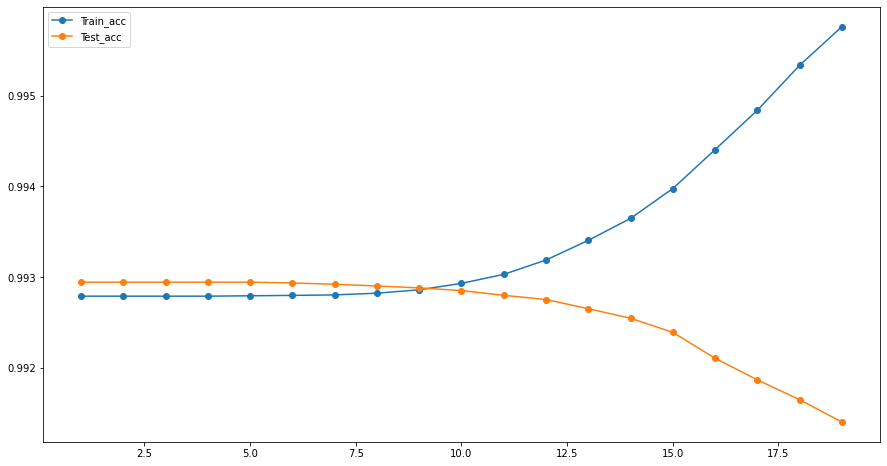

In [96]:
from matplotlib import pyplot

pyplot.plot(range(1,20),train_scores,'-o',label='Train_acc')
pyplot.plot(range(1,20),test_scores,'-o',label='Test_acc')
pyplot.legend()
pyplot.show()

# 최적의 의사결정 나무 깊이는?

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0452117 to fit



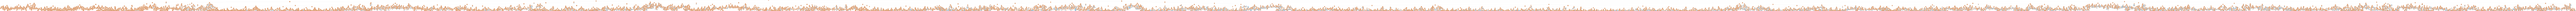

In [97]:
# 트리 시각화
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image



feature_name=['forecast_3_month','forecast_9_month','sales_9_month','perf_6_month_avg','potential_issue','ppap_risk','forcast_1_month','rev_stop'
               ,'forcast_sales_12_month','forcast_perf_1_month_avg']
tree2 = export_graphviz(DT,feature_names=feature_name,
                        class_names=['No','Yes'],
                        filled = True,           
                                
                        special_characters = True) 

graph = pydotplus.graph_from_dot_data(tree2)
Image(graph.create_png())

## 변수 5개만 골라내서 만든 의사결정나무
#### 상위 5개 변수: 'forecast_3_month','forecast_9_month','sales_9_month','ppap_risk','forcast_1_month'

### 모델적합

In [ ]:
df2=df[['forecast_3_month','forecast_9_month','sales_9_month','ppap_risk','forcast_1_month','went_on_backorder']]

In [ ]:
X = df2[['forecast_3_month','forecast_9_month','sales_9_month','ppap_risk','forcast_1_month']]
y = df2[['went_on_backorder']]

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred3 = dt.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred3)

print(acc)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree3 = DecisionTreeClassifier(random_state=0, max_depth=3)
tree3.fit(X_train, y_train)

### 모델 성능평가

In [ ]:
temp_y_pred3 = tree3.predict(X_test)

print('예측값\n',temp_y_pred3)
print('실제값\n',y_test)

In [ ]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

temp_acc3=accuracy_score(y_test,temp_y_pred3)


print("정확도:",format(temp_acc))

In [ ]:
# 오차행렬(Confusion Matrix)
print(confusion_matrix(y_test,temp_y_pred3))

In [ ]:
# 모델성능
print(classification_report((tree3.predict(X_test)>0.5).astype("int16"),y_test))

In [ ]:
from matplotlib import pyplot

pyplot.plot(range(1,20),train_scores,'-o',label='Train_acc')
pyplot.plot(range(1,20),test_scores,'-o',label='Test_acc')
pyplot.legend()
pyplot.show()

# 최적의 의사결정 나무 깊이는?

In [ ]:
# 트리 시각화
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz


feature_name=['forecast_3_month','forecast_9_month','sales_9_month','ppap_risk','forcast_1_month']
tree3 = export_graphviz(tree,feature_names=feature_name,
                        class_names=['No','Yes'],
                        
                            
                                
                          filled = True,           
                                
                          special_characters = True) 

graph = pydotplus.graph_from_dot_data(tree)
Image(graph.create_png())

In [ ]:
#정확도 비교 

print('모든변수를 이용한 의사결정 나무 정확도:',temp_acc1)
print('10개 변수를 이용한 의사결정 나무 정확도:',temp_acc2)
print('5개의 변수를 이용한 의사결정 나무 정확도:',temp_acc3)

# 랜덤포레스트
## 모든 변수를 사용한 랜덤포레스트

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df= pd.read_csv("dataset/backorder_addcol.csv")

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df = df.drop(['Unnamed: 0', 'sku'], axis=1)

In [ ]:
X= df.drop(['went_on_backorder'], axis=1)
y= np.array(df['went_on_backorder'])

In [ ]:
df

In [ ]:
df['forecast_9_month'].nunique()

In [ ]:
df.isnull().sum()

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(random_state=0,max_depth=10)
tree1.fit(X_train, y_train)

In [ ]:
temp_y_pred1 = tree.predict(X_test)
# Training 값을 X_test에서 넣음
print("예측값\n", temp_y_pred1)
print("실제값\n", y_test)

In [ ]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc1 = accuracy_score(y_test, temp_y_pred1)
# y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함

print("정확도: ", format(temp_acc1))

In [ ]:
print(confusion_matrix(y_test, temp_y_pred1))

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

print('accuracy: ', accuracy_score(y_test, temp_y_pred1))
print('precision: ', precision_score(y_test, temp_y_pred1))
print('recall: ', recall_score(y_test, temp_y_pred1))
print('f1: ', f1_score(y_test, temp_y_pred1))

In [ ]:
print(classification_report(y_test, (tree.predict(X_test))))

In [ ]:
print(classification_report(y_test,(tree.predict(X_test) > 0.5).astype("int16") ))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF1 = RandomForestClassifier(n_estimators=100, random_state=0)
# n_estimators: 사용할 tree의 갯수

In [ ]:
RF1.fit(X_train, y_train)

In [ ]:
temp_y_pred_rf1 = RF1.predict(X_test)
temp_y_pred_rf1

In [ ]:
# 정확도 계산
temp_acc1 = accuracy_score(y_test, temp_y_pred_rf1)
print(format(temp_acc1))

In [ ]:
scores =[]
for i in range(10,500,100):
    RF1 = RandomForestClassifier(n_estimators=i, random_state=0)
    RF1.fit(X_train,y_train)
    
    att = RF1.predict(X_test)
    acc = accuracy_score(y_test,att)
    scores.append(acc)
    
    print('>%d, acc: %.3f' % (i,acc))

In [ ]:
# 그래프로 나타내기
from matplotlib import pyplot
import graphviz
from sklearn.tree import export_graphviz
pyplot.plot(range(10,500,100),scores, 'b--', label ='RF_acc')
pyplot.legend()

In [ ]:
# 랜덤포레스트 모델 성능 적합 전
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf1))
print('precision: ', precision_score(y_test, temp_y_pred_rf1))
print('recall: ', recall_score(y_test, temp_y_pred_rf1))
print('f1: ', f1_score(y_test, temp_y_pred_rf1))

In [ ]:
# n_estimators =110으로 새로 적합
RF1 = RandomForestClassifier(n_estimators=110, random_state=0)
RF1.fit(X_train, y_train)
temp_y_pred_rf1 = RF1.predict(X_test)

In [ ]:
# 랜덤포레스트 모델 성능  적합 후
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf1))
print('precision: ', precision_score(y_test, temp_y_pred_rf1))
print('recall: ', recall_score(y_test, temp_y_pred_rf1))
print('f1: ', f1_score(y_test, temp_y_pred_rf1))

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr2,tpr2,thresholds2 = roc_curve(y_test, RF1.predict_proba(X_test)[:,1]) # 랜덤포레스트

In [ ]:
# b--: 색깔

plt.plot(fpr2,tpr2,'r--',label="Random Forest")
plt.plot([0,1],[0,1], 'g--', label ='random guess')

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

### 변수 중요도

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
RF1 = DecisionTreeClassifier(max_depth = 3, random_state=0)
RF1.fit(X_train, y_train)

In [ ]:
RF1.feature_importances_

In [ ]:
pd.DataFrame(RF1.feature_importances_.reshape((1,-1)), index =['feature_importance'])

In [ ]:
df.columns

In [ ]:
a = pd.DataFrame(RF.feature_importances_.reshape((1,-1)), columns=df.columns[1:], index =['f_importance'])
b = a.T

In [ ]:
b = b.sort_values(by = 'f_importance',ascending = False)
b

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(layout=go.Layout(height=600, width=1000))


fig.add_trace(
    go.Scatter(
        x=b.index, y=b['f_importance'], name = '변수 중요도',mode='lines+markers',
        line = dict(color='red'), marker = dict(color='skyblue')
    )
)


fig.update_layout(
{
    'title':{
        'text':'로지스틱 회귀 - 변수 중요도',
        'font':{
            'size':15
        }
    },
    'showlegend':True,
    'xaxis':{
        'title':'컬럼명'
    },
    'yaxis':{
        'title':'변수 중요도 값'
    }
})

fig.update_layout( template = 'plotly_dark')

fig.show()

### 변수 10개

In [ ]:
data = df[['forecast_3_month','forecast_9_month','sales_9_month','perf_6_month_avg','potential_issue','ppap_risk','forcast_1_month','rev_stop'
         ,'forcast_sales_12_month','forcast_perf_1_month_avg','went_on_backorder']]

In [ ]:
data

In [ ]:
data.isnull().sum()

In [ ]:
X= data.drop(['went_on_backorder'], axis=1)
y= np.array(data['went_on_backorder'])

In [ ]:
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree2 = DecisionTreeClassifier(random_state=0,max_depth=20)
tree2.fit(X_train, y_train)

In [ ]:
temp_y_pred2 = tree2.predict(X_test)
# Training 값을 X_test에서 넣음
print("예측값\n", temp_y_pred2)
print("실제값\n", y_test)

In [ ]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc2 = accuracy_score(y_test, temp_y_pred2)
# y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함

print("정확도: ", format(temp_acc2))

In [ ]:
print(confusion_matrix(y_test, temp_y_pred2))

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

print('accuracy: ', accuracy_score(y_test, temp_y_pred2))
print('precision: ', precision_score(y_test, temp_y_pred2))
print('recall: ', recall_score(y_test, temp_y_pred2))
print('f1: ', f1_score(y_test, temp_y_pred2))

In [ ]:
print(classification_report(y_test, (tree2.predict(X_test))))

In [ ]:
print(classification_report(y_test,(tree2.predict(X_test) > 0.5).astype("int16") ))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF2 = RandomForestClassifier(n_estimators=100, random_state=0)
# n_estimators: 사용할 tree의 갯수

In [ ]:
RF2.fit(X_train, y_train)

In [ ]:
temp_y_pred_rf2 = RF2.predict(X_test)
temp_y_pred_rf2

In [ ]:
# 정확도 계산
temp_acc2 = accuracy_score(y_test, temp_y_pred_rf2)
print(format(temp_acc2))

In [ ]:
scores =[]
for i in range(10,500,100):
    RF2 = RandomForestClassifier(n_estimators=i, random_state=0)
    RF2.fit(X_train,y_train)
    
    att = RF2.predict(X_test)
    acc = accuracy_score(y_test,att)
    scores.append(acc)
    
    print('>%d, acc: %.3f' % (i,acc))

In [ ]:
# 그래프로 나타내기
from matplotlib import pyplot
import graphviz
from sklearn.tree import export_graphviz
pyplot.plot(range(10,500,100),scores, 'b--', label ='RF_acc')
pyplot.legend()

In [ ]:
# 랜덤포레스트 모델 성능 적합 전
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf2))
print('precision: ', precision_score(y_test, temp_y_pred_rf2))
print('recall: ', recall_score(y_test, temp_y_pred_rf2))
print('f1: ', f1_score(y_test, temp_y_pred_rf2))

In [ ]:
# n_estimators =400으로 새로 적합
RF2 = RandomForestClassifier(n_estimators=400, random_state=0)
RF2.fit(X_train, y_train)
temp_y_pred_rf2 = RF2.predict(X_test)

In [ ]:
# 랜덤포레스트 모델 성능  적합 후
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf2))
print('precision: ', precision_score(y_test, temp_y_pred_rf2))
print('recall: ', recall_score(y_test, temp_y_pred_rf2))
print('f1: ', f1_score(y_test, temp_y_pred_rf2))

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr2,tpr2,thresholds2 = roc_curve(y_test, RF2.predict_proba(X_test)[:,1]) # 랜덤포레스트

In [ ]:
# b--: 색깔

plt.plot(fpr2,tpr2,'r--',label="Random Forest")
plt.plot([0,1],[0,1], 'g--', label ='random guess')

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

### 변수 5개

In [ ]:
data1 = df[['forcast_sales_12_month','in_transit_qty','forecast_6_month','forcast_1_month','forecast_9_month','went_on_backorder']]

In [ ]:
data1

In [ ]:
data1.isnull().sum()

In [ ]:
X= data1.drop(['went_on_backorder'], axis=1)
y= np.array(data1['went_on_backorder'])

In [ ]:
from sklearn.model_selection import train_test_split

# random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree3 = DecisionTreeClassifier(random_state=0,max_depth=20)
tree3.fit(X_train, y_train)

In [ ]:
temp_y_pred3 = tree3.predict(X_test)
# Training 값을 X_test에서 넣음
print("예측값\n", temp_y_pred3)
print("실제값\n", y_test)

In [ ]:
# 정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc3 = accuracy_score(y_test, temp_y_pred3)
# y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함

print("정확도: ", format(temp_acc3))

In [ ]:
print(confusion_matrix(y_test, temp_y_pred3))

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

print('accuracy: ', accuracy_score(y_test, temp_y_pred3))
print('precision: ', precision_score(y_test, temp_y_pred3))
print('recall: ', recall_score(y_test, temp_y_pred3))
print('f1: ', f1_score(y_test, temp_y_pred3))

In [ ]:
print(classification_report(y_test, (tree3.predict(X_test))))

In [ ]:
print(classification_report(y_test,(tree3.predict(X_test) > 0.5).astype("int16") ))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF3 = RandomForestClassifier(n_estimators=100, random_state=0)
# n_estimators: 사용할 tree의 갯수

In [ ]:
RF3.fit(X_train, y_train)

In [ ]:
temp_y_pred_rf3 = RF3.predict(X_test)
temp_y_pred_rf3

In [ ]:
# 정확도 계산
temp_acc3 = accuracy_score(y_test, temp_y_pred_rf3)
print(format(temp_acc3))

In [ ]:
scores =[]
for i in range(10,500,100):
    RF3 = RandomForestClassifier(n_estimators=i, random_state=0)
    RF3.fit(X_train,y_train)
    
    att = RF3.predict(X_test)
    acc = accuracy_score(y_test,att)
    scores.append(acc)
    
    print('>%d, acc: %.3f' % (i,acc))

In [ ]:
# 그래프로 나타내기
from matplotlib import pyplot
import graphviz
from sklearn.tree import export_graphviz
pyplot.plot(range(10,500,100),scores, 'b--', label ='RF_acc')
pyplot.legend()

In [ ]:
# 랜덤포레스트 모델 성능 적합 전
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf3))
print('precision: ', precision_score(y_test, temp_y_pred_rf3))
print('recall: ', recall_score(y_test, temp_y_pred_rf3))
print('f1: ', f1_score(y_test, temp_y_pred_rf3))

In [ ]:
# n_estimators =400으로 새로 적합
RF3 = RandomForestClassifier(n_estimators=400, random_state=0)
RF3.fit(X_train, y_train)
temp_y_pred_rf3 = RF3.predict(X_test)

In [ ]:
# 랜덤포레스트 모델 성능  적합 후
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf3))
print('precision: ', precision_score(y_test, temp_y_pred_rf3))
print('recall: ', recall_score(y_test, temp_y_pred_rf3))
print('f1: ', f1_score(y_test, temp_y_pred_rf3))

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr2,tpr2,thresholds2 = roc_curve(y_test, RF3.predict_proba(X_test)[:,1]) # 랜덤포레스트

In [ ]:
# b--: 색깔

plt.plot(fpr2,tpr2,'r--',label="Random Forest")
plt.plot([0,1],[0,1], 'g--', label ='random guess')

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")

### 변수가 5개인 의사결정나무와 랜덤포레스트 ROC커브 비교

In [ ]:
# ROC 커브/AUC 비교
from sklearn.metrics import roc_curve

fpr1,tpr1,thresholds1 = roc_curve(y_test,tree3.predict_proba(X_test)[:,1])
fpr2,tpr2,thresholds2 = roc_curve(y_test,RF3.predict_proba(X_test)[:,1])

In [ ]:
plt.plot(fpr1, tpr1, 'b--', label='Decision Tree')
plt.plot(fpr2,tpr2,'r--',label='Random Forest')
plt.plot([0,1],[0,1],'g--',label = 'random guess')

plt.title('ROC curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### 변수가 5개인 의사결정 모델과 랜덤포레스트의 모델성능 비교

In [ ]:
# 의사결정나무 모델성능
print(classification_report((tree3.predict(X_test)>0.5).astype("int16"),y_test))

In [ ]:
# 랜덤포레스트 모델 성능  적합 후
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf3))
print('precision: ', precision_score(y_test, temp_y_pred_rf3))
print('recall: ', recall_score(y_test, temp_y_pred_rf3))
print('f1: ', f1_score(y_test, temp_y_pred_rf3))